In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import cv2
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table

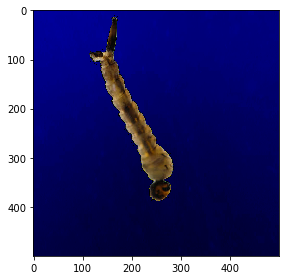

In [11]:
"""Cut mask out of image with certain pixel margin"""
image = imread('pic.png')
mask = imread('mask.png')

imshow(image)
# get (i, j) positions of all RGB pixels that are black (i.e. [0, 0, 0])
black_pixels = np.where(
    (mask[:, :, 0] == 0) & 
    (mask[:, :, 1] == 0) & 
    (mask[:, :, 2] == 0)
)
# set those pixels to blue
mask[black_pixels] = [0, 0, 255]
# imshow(mask)

# Create structuring element, dilate and bitwise-and
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
# dilate = cv2.dilate(mask, kernel, iterations=3)

result_only_larvae = cv2.bitwise_and(image, mask)
# imshow(image)
imshow(result_only_larvae)

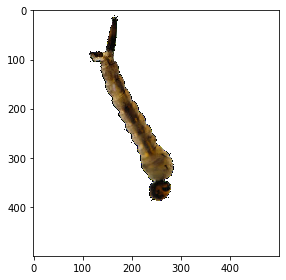

In [12]:
blue_pixels = np.where(
    (result_only_larvae[:, :, 0] == 0) & 
    (result_only_larvae[:, :, 1] == 0)
)
# print(blue_pixels)
result_only_larvae[blue_pixels] = [255, 255, 255]

# height, width, _ = result_only_larvae.shape

# for i in range(height):
#     for j in range(width):
#         print(result_only_larvae[i,j])
# #         if result_only_larvae[i,j].sum() == 255:
            

imshow(result_only_larvae)

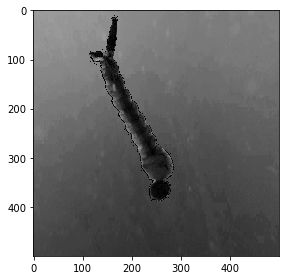

In [3]:
imshow(result_only_larvae[ : , : , 2])

In [35]:
number_of_black_pix = np.sum(result_only_larvae[ : , : , 2] == 0)
print(number_of_black_pix)

531


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


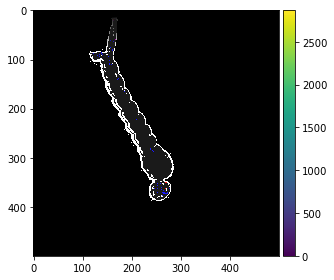

In [28]:
image1 = imread('pic.png')
mask1 = imread('mask.png'
              
label_im = label(mask1)
regions = regionprops(label_im)
imshow(label_im)